## Beer Advocate pre-processing test

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import difflib
import os
from datetime import datetime
from math import radians, sin, cos, sqrt, atan2

In [6]:
# Define the data folder paths for BeerAdvocate
# DATA_FOLDER_BA = 'DATA/BeerAdvocate/'
DATA_FOLDER_BA = '../DATA/BeerAdvocate/'

# Define the file paths for the datasets
Beers_DATASET = DATA_FOLDER_BA+"beers.csv"
Users_DATASET = DATA_FOLDER_BA+"users.csv"
Reviews_DATASET = DATA_FOLDER_BA+"reviews_BA.csv"
Breweries_DATASET = DATA_FOLDER_BA+"breweries.csv"

## BEERS

In [7]:
# Read the datasets into Pandas DataFrames
beers = pd.read_csv(Beers_DATASET)
display(beers)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280818,19139,Kölsch Ale,885,Summit Station Restaurant & Brewery,Kölsch,3,3,2.71,NaN,NaN,5.0,2.713333,NaN,0,NaN
280819,19140,Nut Brown Ale,885,Summit Station Restaurant & Brewery,English Brown Ale,2,1,3.10,NaN,NaN,5.3,3.250000,NaN,0,NaN
280820,19146,Octoberfest,885,Summit Station Restaurant & Brewery,Märzen / Oktoberfest,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
280821,2805,Scotch Ale,885,Summit Station Restaurant & Brewery,Scotch Ale / Wee Heavy,0,0,NaN,NaN,NaN,7.0,NaN,NaN,0,NaN


In [8]:
MIN_NUMBER_OF_REVIEWS = 5
beers_filt = beers.copy(deep=True)
beers_filt = beers_filt[beers_filt['nbr_reviews'] >= MIN_NUMBER_OF_REVIEWS]
beers_filt = beers_filt[beers_filt['nbr_reviews'].notna()]
beers_filt = beers_filt.drop_duplicates(subset=['beer_name'])
dupli_name = np.sum(beers_filt.duplicated(subset=['beer_name']))
dupli_ID = np.sum(beers_filt.duplicated(subset=['beer_id']))

beers_filt = beers_filt.drop(['zscore','nbr_matched_valid_ratings','avg_matched_valid_ratings','bros_score','ba_score'],axis=1)
display(beers_filt)
print(f'Number of duplicate beer name = {dupli_name}')
print(f'Number of duplicate beer ID = {dupli_ID}')

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,abv,avg_computed
25,19827,Legbiter,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,75,59,3.45,4.8,3.439867
26,20841,St. Patrick's Ale,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,8,6,3.86,6.0,3.888750
27,20842,St. Patrick's Best,10093,Strangford Lough Brewing Company Ltd,English Bitter,64,48,3.56,4.2,3.556094
33,825,Caffrey's Irish Ale,297,Thomas Caffrey Brewing Co.,Irish Red Ale,131,82,3.23,3.8,3.286260
44,16371,Belfast Ale,3415,Whitewater Brewing Co,English Pale Ale,21,13,3.69,4.5,3.666667
...,...,...,...,...,...,...,...,...,...,...
280791,67855,Pivotal Porter (Barrel Aged),23640,Twisted Manzanita Ales,American Porter,19,11,3.28,7.5,3.302105
280796,61815,Riverwalk Blonde,23640,Twisted Manzanita Ales,American Blonde Ale,55,20,3.44,6.0,3.476545
280799,61816,Rustic Horizon Red Ale,23640,Twisted Manzanita Ales,American Amber / Red Ale,40,17,3.34,6.8,3.399000
280807,77211,Where There's Smoke,23640,Twisted Manzanita Ales,Smoked Beer,18,5,3.72,7.4,3.536111


Number of duplicate beer name = 0
Number of duplicate beer ID = 0


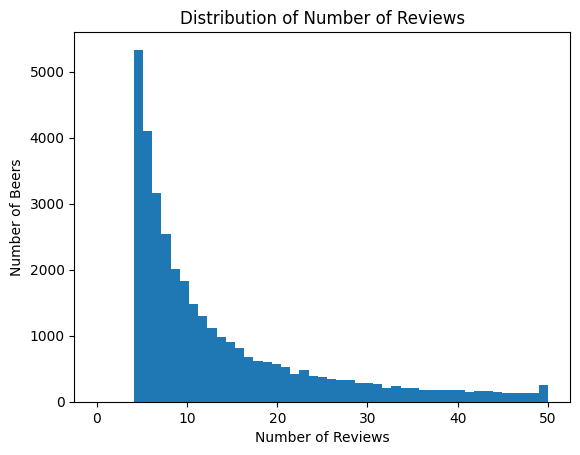

In [9]:
plt.hist(beers_filt['nbr_reviews'],bins=np.linspace(0,50,50))
# Set x and y labels and the title
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Beers')
plt.title('Distribution of Number of Reviews')
plt.show()

## USERS

In [216]:
users = pd.read_csv(Users_DATASET)
display(users)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
153699,1,1,everman.532342,Everman,1.291115e+09,"United States, California"
153700,1,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California"
153701,1,0,kyungsup.982216,Kyungsup,1.430561e+09,NaN
153702,1,1,joetex.800347,JoeTex,1.400234e+09,"United States, California"


In [219]:
users_filt = users.copy(deep=True)
# Check for duplicates
dupli_name = np.sum(users_filt.duplicated(subset=['user_name']))
dupli_ID = np.sum(users_filt.duplicated(subset=['user_id']))
# Remove users with 0 review and NaN as nb of reviews
users_filt = users_filt[users_filt['nbr_reviews'] >= 1] # ????????????????????????????????????????????????????????????????????????????
users_filt = users_filt[users_filt['nbr_reviews'].notna()]
# Remove Nan in user_id, user_name and user_location
users_filt = users_filt[users_filt['user_id'].notna()]
users_filt = users_filt[users_filt['user_name'].notna()]
users_filt = users_filt[users_filt['location'].notna()]
# Change date type
users_filt['joined'] = users_filt['joined'].apply(lambda x: datetime.utcfromtimestamp(x) if not pd.isna(x) else x)
# Change name of category location into user_location
users_filt.rename(columns={'location': 'user_location'}, inplace = True)
users_filt.reset_index(inplace=True,drop=True)
# Display
display(users_filt)
print(f'Number of duplicate user name = {dupli_name}')
print(f'Number of duplicate user ID = {dupli_ID}')
print('Number of NaN by category:')
print(np.sum(users_filt.isna()))



,nbr_ratings,nbr_reviews,user_id,user_name,joined,user_location
0,7820,465,nmann08.184925,nmann08,2008-01-07 11:00:00,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,2007-10-08 10:00:00,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,2005-05-18 10:00:00,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,2004-11-25 11:00:00,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,2003-11-20 11:00:00,Northern Ireland
...,...,...,...,...,...,...
58194,1,1,quaffer83.125656,Quaffer83,2007-03-04 11:00:00,"United States, Michigan"
58195,1,1,everman.532342,Everman,2010-11-30 11:00:00,"United States, California"
58196,1,1,justin0001.352175,Justin0001,2009-07-23 10:00:00,"United States, California"
58197,1,1,joetex.800347,JoeTex,2014-05-16 10:00:00,"United States, California"


Number of duplicate user name = 0
Number of duplicate user ID = 0
Number of NaN by category:
nbr_ratings      0
nbr_reviews      0
user_id          0
user_name        0
joined           0
user_location    0
dtype: int64


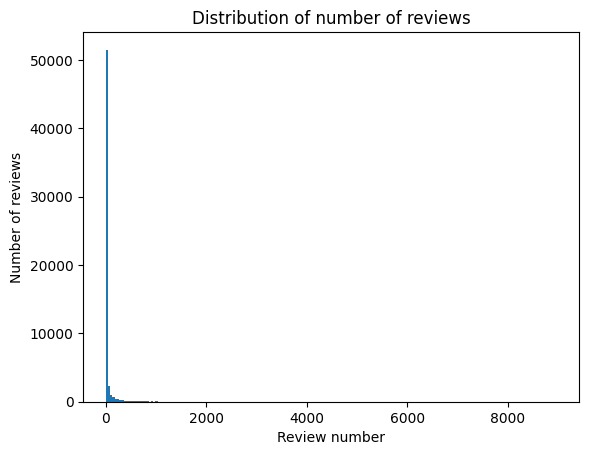

In [224]:
plt.hist(users_filt['nbr_reviews'],bins=200)
# Set x and y labels and the title
plt.xlabel('Review number')
plt.ylabel('Number of reviews')
plt.title('Distribution of number of reviews')
plt.show()


## BREWERIES

In [12]:
breweries = pd.read_csv(Breweries_DATASET)
display(breweries)

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2
...,...,...,...,...
16753,128,Germany,Privatbrauerei Franz Joseph Sailer,6
16754,5023,Aruba,Aruba Brewing,0
16755,1573,"United States, New York",John Harvard’s Brewery & Ale House,491
16756,16186,"United States, North Carolina",Triangle Brewing Company,20


In [135]:
breweries_filt = breweries.copy(deep=True)

dupli_ID = np.sum(breweries_filt.duplicated(subset=['id']))
breweries_filt = breweries_filt[breweries_filt['nbr_beers'] >= 1]
breweries_filt = breweries_filt[breweries_filt.notna()]
breweries_filt = breweries_filt.drop_duplicates(subset='name')
dupli_name = np.sum(breweries_filt.duplicated(subset=['name']))
breweries_filt.rename(columns={'name': 'brewery_name'}, inplace = True)
breweries_filt.rename(columns={'id': 'brewery_id'}, inplace = True)
breweries_filt.rename(columns={'location': 'brewery_location'}, inplace = True)
breweries_filt.reset_index(inplace=True,drop=True)
display(breweries_filt)
print(f'Number of duplicate name = {dupli_name}')
print(f'Number of duplicate ID = {dupli_ID}')
print(np.sum(breweries_filt.isna()))

,brewery_id,brewery_location,brewery_name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2
...,...,...,...,...
14153,16233,"United States, California",Farmhouse Brewing Co.,4
14154,1613,"United States, Florida",Panama City Brewery & Cafe,5
14155,128,Germany,Privatbrauerei Franz Joseph Sailer,6
14156,1573,"United States, New York",John Harvard’s Brewery & Ale House,491


Number of duplicate name = 0
Number of duplicate ID = 0
brewery_id          0
brewery_location    0
brewery_name        0
nbr_beers           0
dtype: int64


## REVIEWS

In [252]:
reviews_BA = pd.read_csv(Reviews_DATASET)
reviews_BA['date'] = reviews_BA['date'].apply(lambda x: datetime.utcfromtimestamp(x) if not pd.isna(x) else x)

display(reviews_BA)

C:\Users\begue\AppData\Local\Temp\ipykernel_26696\3158299788.py:1: DtypeWarning: Columns (5,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_BA = pd.read_csv(Reviews_DATASET)


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,2008-04-09 10:00:00,Proteus93,proteus93.185128,4.0,4.5,4.5,4.5,4.0,4.37,"A: A deep amber, with a bit of a shorter head..."
1,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,2008-04-07 10:00:00,Jerico,jerico.36192,4.0,4.0,3.0,3.0,3.5,3.40,Poured this into a Bordeaux wine glass.A - A ...
2,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,2008-04-06 10:00:00,armock,armock.159910,4.0,4.5,4.0,4.5,4.0,4.32,A - Poured a dark amber color with an of whit...
3,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,2008-04-06 10:00:00,RickSawyer,ricksawyer.141904,3.5,4.5,4.0,4.0,4.5,4.19,Pours ruby brown with a mahogany heart. Tight...
4,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,2008-04-05 10:00:00,mattster,mattster.120835,4.0,4.0,4.0,4.5,4.5,4.30,"Opened 22 fluid ounce bomber bottle, poured i..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589581,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,2008-04-17 10:00:00,hyland24,hyland24.198789,4.5,4.5,4.0,4.5,4.5,4.45,Poured from a bomber into a pilsner glass. Dr...
2589582,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,2008-04-17 10:00:00,indiapaleale,indiapaleale.2781,4.5,4.0,4.0,4.5,4.0,4.23,Pours a nice dark mahogany color with a beaut...
2589583,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,2008-04-17 10:00:00,Moxley,moxley.205446,5.0,4.0,4.5,5.0,4.5,4.61,Enjoyed a nice 3-way tasting with fellow BA m...
2589584,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,7.2,2008-04-16 10:00:00,Pleepleus,pleepleus.211613,5.0,3.0,4.5,4.5,4.5,4.17,Enjoyed this Arrogant Bastard with fellow BA ...


In [253]:
reviews_filt = reviews_BA.copy(deep=True)
print('Number of NaN by category:')
print(np.sum(reviews_filt.isna()))
# drop nan in text
reviews_filt = reviews_filt[reviews_filt['text'].notna()]
# drop abv column
reviews_filt = reviews_filt.drop(['abv'],axis=1)

# Remove the first \n in user_id, user_name, beer_name, brewery_name, style, text
reviews_filt.user_id = reviews_filt.user_id.apply(lambda x : x.strip())
reviews_filt.user_name = reviews_filt.user_name.astype(str).apply(lambda x : x.strip())
reviews_filt.beer_name = reviews_filt.beer_name.apply(lambda x : x.strip())
reviews_filt.brewery_name = reviews_filt.brewery_name.apply(lambda x : x.strip())
reviews_filt['style'] = reviews_filt['style'].apply(lambda x : x.strip())
reviews_filt.text = reviews_filt.text.apply(lambda x : x.strip())

display(reviews_filt)

Number of NaN by category:
beer_name       0
beer_id         0
brewery_name    0
brewery_id      0
style           0
abv             0
date            0
user_name       0
user_id         0
appearance      0
aroma           0
palate          0
taste           0
overall         0
rating          0
text            2
dtype: int64


,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-04-09 10:00:00,Proteus93,proteus93.185128,4.0,4.5,4.5,4.5,4.0,4.37,"A: A deep amber, with a bit of a shorter head...."
1,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-04-07 10:00:00,Jerico,jerico.36192,4.0,4.0,3.0,3.0,3.5,3.40,Poured this into a Bordeaux wine glass.A - A p...
2,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-04-06 10:00:00,armock,armock.159910,4.0,4.5,4.0,4.5,4.0,4.32,A - Poured a dark amber color with an of white...
3,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-04-06 10:00:00,RickSawyer,ricksawyer.141904,3.5,4.5,4.0,4.0,4.5,4.19,"Pours ruby brown with a mahogany heart. Tight,..."
4,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-04-05 10:00:00,mattster,mattster.120835,4.0,4.0,4.0,4.5,4.5,4.30,"Opened 22 fluid ounce bomber bottle, poured in..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589581,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-04-17 10:00:00,hyland24,hyland24.198789,4.5,4.5,4.0,4.5,4.5,4.45,Poured from a bomber into a pilsner glass. Dra...
2589582,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-04-17 10:00:00,indiapaleale,indiapaleale.2781,4.5,4.0,4.0,4.5,4.0,4.23,Pours a nice dark mahogany color with a beauti...
2589583,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-04-17 10:00:00,Moxley,moxley.205446,5.0,4.0,4.5,5.0,4.5,4.61,Enjoyed a nice 3-way tasting with fellow BA me...
2589584,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-04-16 10:00:00,Pleepleus,pleepleus.211613,5.0,3.0,4.5,4.5,4.5,4.17,Enjoyed this Arrogant Bastard with fellow BA m...


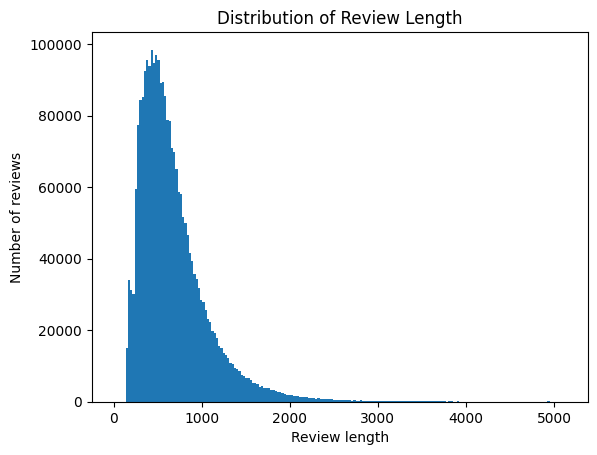

count    2.589584e+06
mean     6.765771e+02
std      4.082239e+02
min      7.000000e+00
25%      4.030000e+02
50%      5.800000e+02
75%      8.330000e+02
max      5.129000e+03
Name: text, dtype: float64

In [48]:
plt.hist(reviews_filt['text'].str.len(),bins=200)
# Set x and y labels and the title
plt.xlabel('Review length')
plt.ylabel('Number of reviews')
plt.title('Distribution of Review Length')
plt.show()
reviews_filt['text'].str.len().describe()

In [ ]:
# Remove text smaller than 10 characters
#reviews_filt = reviews_filt[reviews_filt['text'].str.len()>50]


# Analysis of Brewery Location

We want to analyse the location of the breweries in the dataset. To do so, we couple the dataset with a map. First we have to be sure that the name used for the countries in the map are the same as the name used in the brewery dataset. To do so, if both the brewery location name does not exists in the world map name, we compute the Hamming distance between them and replace the brewery location with the closest match. Additionnaly we do the same process for the states in the United States of America.

In [376]:
# Hamming distance
def find_closest_match(input_str, target_list):
    """Find the closest match in a list using Hamming distance."""
    return difflib.get_close_matches(input_str, target_list, n=1, cutoff=0.5)

In [431]:
breweries_loc = breweries_filt.copy(deep=True)
# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Load the USA state map
us_states = gpd.read_file('GeoJSON/gz_2010_us_040_00_500k.json')
# Extract countries name
unique_loc = world['name'].unique()
# Extract state name
unique_state = us_states['NAME'].unique()
# Create column for state in breweries df, will be used for USA
breweries_loc['brewery_state'] = '-'

# Loop through the 'brewery_location' column and replace values if needed
for i, location in enumerate(breweries_loc['brewery_location']):
    try:
        location, state = location.split(', ')
    except:
        state = location
    closest_match_country = find_closest_match(location, unique_loc)
    
    if closest_match_country:
        
        if closest_match_country[0] == 'United States of America':
            breweries_loc.at[i, 'brewery_location'] = closest_match_country[0]
            # Find state
            #state = location.split(', ')[1]
            closest_match_state = find_closest_match(state, unique_state)
            if closest_match_state:
                breweries_loc.at[i, 'brewery_state'] = closest_match_state[0]
            else:
                breweries_loc = breweries_loc.drop(index=i)
        else:
            # Replace the value in the DataFrame
            breweries_loc.at[i, 'brewery_location'] = closest_match_country[0]
            breweries_loc.at[i, 'brewery_state'] = closest_match_country[0]
    else:
        breweries_loc = breweries_loc.drop(index=i)
display(breweries_loc)

,brewery_id,brewery_location,brewery_name,nbr_beers,brewery_state
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5,Kyrgyzstan
1,39913,Kyrgyzstan,Arpa (АРПА),1,Kyrgyzstan
2,39914,Kyrgyzstan,Bear Beer,4,Kyrgyzstan
3,39915,Kyrgyzstan,Blonder Pub,4,Kyrgyzstan
4,39916,Kyrgyzstan,Kellers Bier,2,Kyrgyzstan
...,...,...,...,...,...
14153,16233,United States of America,Farmhouse Brewing Co.,4,California
14154,1613,United States of America,Panama City Brewery & Cafe,5,Florida
14155,128,Germany,Privatbrauerei Franz Joseph Sailer,6,Germany
14156,1573,United States of America,John Harvard’s Brewery & Ale House,491,New York


### Top 10 countries with most breweries

In [432]:
# Count the number of breweries in each country
brewery_counts = breweries_loc['brewery_location'].value_counts().reset_index()
brewery_counts.columns = ['brewery_location', 'nb_breweries']

# Find top 10 countries
top10 = brewery_counts.sort_values(by='nb_breweries', ascending=False).head(10)
top10 = top10[['brewery_location','nb_breweries']]
top10.index = np.linspace(1,10,10).astype(int)
top10.nb_breweries = top10.nb_breweries.astype(int)
print('Top 10 countries with most breweries:')
display(top10)

Top 10 countries with most breweries:


,brewery_location,nb_breweries
1,United States of America,6524
2,Germany,953
3,Finland,934
4,Canada,777
5,Australia,342
6,Belgium,319
7,France,317
8,Italy,309
9,Spain,278
10,Poland,229


As we can see, there are significantly more breweries in the USA than everywhere else. For this reason, we will consider the breweries by states in the next section.

In [448]:
# Add US states to world df
us_states.rename(columns={'NAME': 'name'}, inplace = True)
world_with_US_states = pd.concat([world[['name','geometry']],us_states[['name','geometry']]])
world_with_US_states = world_with_US_states[world_with_US_states['name'] != 'United States of America']

display(world_with_US_states)

,name,geometry
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
5,Kazakhstan,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
...,...,...
47,South Dakota,"POLYGON ((-96.44341 42.48949, -96.45971 42.486..."
48,Vermont,"POLYGON ((-72.04008 44.15575, -72.04271 44.152..."
49,Virginia,"MULTIPOLYGON (((-76.04653 37.95359, -76.04169 ..."
50,West Virginia,"POLYGON ((-81.96830 37.53780, -81.96540 37.541..."


Top 10 countries (considering US states) with most breweries:


,name,nb_breweries
1,Germany,953
2,Finland,934
3,California,823
4,Canada,777
5,New York,368
6,Washington,357
7,Colorado,351
8,Australia,342
9,Belgium,319
10,France,317


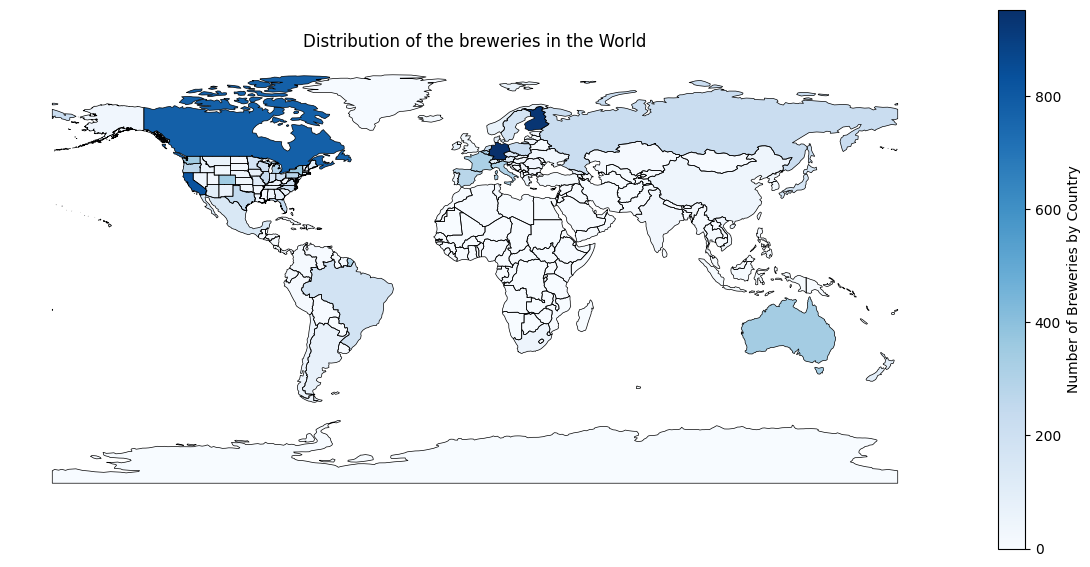

In [449]:
# Count the number of breweries in each country
brewery_counts = breweries_loc['brewery_state'].value_counts().reset_index()
brewery_counts.columns = ['brewery_state', 'nb_breweries']

# Merge brewery counts with the world map data
world_merge = world_with_US_states.merge(brewery_counts, how='left', left_on='name', right_on='brewery_state')

# Fill NaN values (countries without breweries) with 0
world_merge['nb_breweries'].fillna(0, inplace=True)
world_merge['brewery_state'].fillna('Unknown', inplace=True)

# Find top 10 countries
top10 = world_merge.sort_values(by='nb_breweries', ascending=False).head(10)
top10 = top10[['name','nb_breweries']]
top10.index = np.linspace(1,10,10).astype(int)
top10.nb_breweries = top10.nb_breweries.astype(int)
print('Top 10 countries (considering US states) with most breweries:')
display(top10)
# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
world_merge.boundary.plot(ax=ax, color='black', linewidth=0.5)
world_merge.plot(column='nb_breweries', ax=ax, legend=True,
           legend_kwds={'label': "Number of Breweries by Country",
                        'orientation': "vertical"},
           cmap='Blues')

# Remove the axis
ax.set_title('Distribution of the breweries in the World')
ax.set_axis_off()
plt.show()


# Analysis of User Location

In [384]:
users_loc = users_filt.copy(deep=True)

# Create column for state in users df, will be used for USA
users_loc['user_state'] = '-'

# Loop through the 'brewery_location' column and replace values if needed
for i, location in enumerate(users_loc['user_location']):
    try:
        location, state = location.split(', ')
    except:
        state = location
    closest_match_country = find_closest_match(location, unique_loc)

    # if there is a match
    if closest_match_country:
        if closest_match_country[0] == 'United States of America':
            users_loc.at[i, 'user_location'] = closest_match_country[0]
            # find state
            closest_match_state = find_closest_match(state, unique_state)
            if closest_match_state:
                users_loc.at[i, 'user_state'] = closest_match_state[0]
            else:
                users_loc = users_loc.drop(index=i)
        else:
            # Replace the value in the DataFrame
            users_loc.at[i, 'user_location'] = closest_match_country[0]
            users_loc.at[i, 'user_state'] = closest_match_country[0]
    # No match, drop row
    else:
        users_loc = users_loc.drop(index=i)

display(users_loc)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,user_location,user_state
0,7820,465,nmann08.184925,nmann08,2008-01-07 11:00:00,United States of America,Washington
1,2521,2504,stjamesgate.163714,StJamesGate,2007-10-08 10:00:00,United States of America,New York
2,1797,1143,mdagnew.19527,mdagnew,2005-05-18 10:00:00,North Korea,North Korea
3,31,31,helloloser12345.10867,helloloser12345,2004-11-25 11:00:00,North Korea,North Korea
4,604,604,cypressbob.3708,cypressbob,2003-11-20 11:00:00,North Korea,North Korea
...,...,...,...,...,...,...,...
58194,1,1,quaffer83.125656,Quaffer83,2007-03-04 11:00:00,United States of America,Michigan
58195,1,1,everman.532342,Everman,2010-11-30 11:00:00,United States of America,California
58196,1,1,justin0001.352175,Justin0001,2009-07-23 10:00:00,United States of America,California
58197,1,1,joetex.800347,JoeTex,2014-05-16 10:00:00,United States of America,California


### Top 10 countries with most reviewers

In [389]:
# Count the number of breweries in each country
reviewers_counts = users_loc['user_location'].value_counts().reset_index()
reviewers_counts.columns = ['user_location', 'nb_reviewers']

# Find top 10 countries
top10 = reviewers_counts.sort_values(by='nb_reviewers', ascending=False).head(10)
top10 = top10[['user_location','nb_reviewers']]
top10.index = np.linspace(1,10,10).astype(int)
top10.nb_reviewers = top10.nb_reviewers.astype(int)
print('Top 10 countries with most reviewers:')
display(top10)

Top 10 countries with most reviewers:


,user_location,nb_reviewers
1,United States of America,53879
2,Canada,1798
3,Finland,432
4,Australia,328
5,Germany,190
6,Sweden,141
7,Netherlands,101
8,Belgium,100
9,Ireland,78
10,Mexico,78


As we can see there is a lot of reviewers in the USA. In the next section we consider the american reviewers by states.

Top 10 countries (considering US states) with most reviewers:


,name,nb_reviewers
1,California,5897
2,Pennsylvania,3942
3,New York,3529
4,Illinois,3123
5,Massachusetts,3104
6,Texas,2626
7,Florida,2209
8,Ohio,2185
9,Michigan,2018
10,Canada,1798


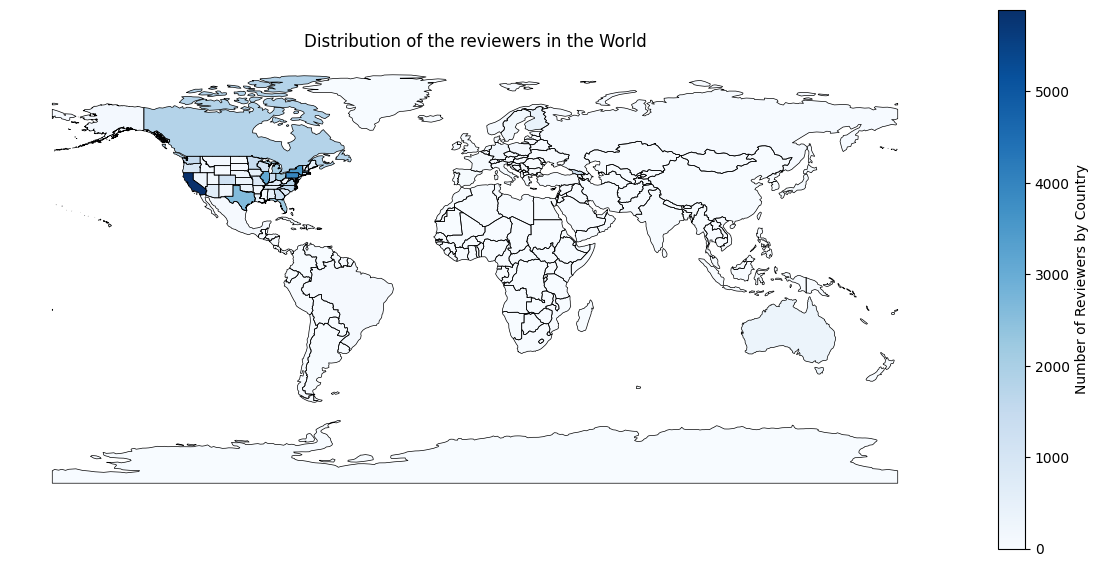

In [390]:
# Count the number of breweries in each country
reviewers_counts = users_loc['user_state'].value_counts().reset_index()
reviewers_counts.columns = ['user_state', 'nb_reviewers']

# Merge brewery counts with the world map data
world_merge = world_with_US_states.merge(reviewers_counts, how='left', left_on='name', right_on='user_state')

# Fill NaN values (countries without breweries) with 0
world_merge['nb_reviewers'].fillna(0, inplace=True)
world_merge['user_state'].fillna('Unknown', inplace=True)

# Find top 10 countries
top10 = world_merge.sort_values(by='nb_reviewers', ascending=False).head(10)
top10 = top10[['name','nb_reviewers']]
top10.index = np.linspace(1,10,10).astype(int)
top10.nb_reviewers = top10.nb_reviewers.astype(int)
print('Top 10 countries (considering US states) with most reviewers:')
display(top10)
# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
world_merge.boundary.plot(ax=ax, color='black', linewidth=0.5)
world_merge.plot(column='nb_reviewers', ax=ax, legend=True,
           legend_kwds={'label': "Number of Reviewers by Country",
                        'orientation': "vertical"},
           cmap='Blues')

# Remove the axis
ax.set_title('Distribution of the reviewers in the World')
ax.set_axis_off()
plt.show()

## Relative distance between Reviewers and Breweries

We are interested, for each review, to see the relative distance between the reviewer and the brewery. This would give us some insights in how the popularity of a brewery is spread in the world.

In [450]:
# Add centroid to world dataset
world_with_US_states['centroids'] = world_with_US_states['geometry'].to_crs(3857).centroid
world_with_US_states = world_with_US_states.set_index('name')
display(world_with_US_states)

,geometry,centroids
name,,
Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",POINT (18248781.791 -1958098.338)
Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",POINT (3869295.824 -700307.061)
W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",POINT (-1348402.527 2794163.183)
Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",POINT (-10797792.505 10444215.145)
Kazakhstan,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",POINT (7493752.338 6185359.307)
...,...,...
South Dakota,"POLYGON ((-96.44341 42.48949, -96.45971 42.486...",POINT (-11157802.883 5536181.569)
Vermont,"POLYGON ((-72.04008 44.15575, -72.04271 44.152...",POINT (-8088586.232 5478662.527)
Virginia,"MULTIPOLYGON (((-76.04653 37.95359, -76.04169 ...",POINT (-8772031.618 4512569.380)


In [468]:
#test = world_with_US_states.loc[breweries_loc['brewery_state']].centroids
brew_cen = pd.merge(breweries_loc,world_with_US_states,left_on=['brewery_state'],right_on=['name'],how='inner')
brew_cen.rename(columns={'centroids': 'brewery_centroid'}, inplace = True)
brew_cen = brew_cen.drop(['geometry','nbr_beers','brewery_name'], axis=1)
user_cen = pd.merge(users_loc,world_with_US_states,left_on=['user_state'],right_on=['name'],how='inner')
user_cen = user_cen.drop(['geometry','nbr_ratings','nbr_reviews','user_name','joined'], axis=1)
user_cen.rename(columns={'centroids': 'user_centroid'}, inplace = True)
display(user_cen)
display(brew_cen)

,user_id,user_location,user_state,user_centroid
0,nmann08.184925,United States of America,Washington,POINT (-13408114.383 6008211.115)
1,curiousmonk.543325,United States of America,Washington,POINT (-13408114.383 6008211.115)
2,soupyman10.119359,United States of America,Washington,POINT (-13408114.383 6008211.115)
3,beer-fan-1.897711,United States of America,Washington,POINT (-13408114.383 6008211.115)
4,beerstorian.711598,United States of America,Washington,POINT (-13408114.383 6008211.115)
...,...,...,...,...
59461,roninisc.1204728,Afghanistan,Afghanistan,POINT (7361363.844 4020301.860)
59462,micheal.451084,Vanuatu,Vanuatu,POINT (18598636.273 -1752068.573)
59463,blackterrier.1079343,Vanuatu,Vanuatu,POINT (18598636.273 -1752068.573)
59464,hopmeisterflex.755943,New Caledonia,New Caledonia,POINT (18427504.310 -2423487.891)


,brewery_id,brewery_location,brewery_state,brewery_centroid
0,39912,Kyrgyzstan,Kyrgyzstan,POINT (8308486.350 5090640.192)
1,39913,Kyrgyzstan,Kyrgyzstan,POINT (8308486.350 5090640.192)
2,39914,Kyrgyzstan,Kyrgyzstan,POINT (8308486.350 5090640.192)
3,39915,Kyrgyzstan,Kyrgyzstan,POINT (8308486.350 5090640.192)
4,39916,Kyrgyzstan,Kyrgyzstan,POINT (8308486.350 5090640.192)
...,...,...,...,...
14226,152,United Kingdom,United Kingdom,POINT (-323128.917 7189485.698)
14227,3405,United Kingdom,United Kingdom,POINT (-323128.917 7189485.698)
14228,90,United Kingdom,United Kingdom,POINT (-323128.917 7189485.698)
14229,6878,United Kingdom,United Kingdom,POINT (-323128.917 7189485.698)


In [469]:
review_brew_user = reviews_filt[['brewery_id','user_id']].copy(deep=True)
review_brew_user = pd.merge(review_brew_user,brew_cen,on=['brewery_id'],how='inner')
review_brew_user = pd.merge(review_brew_user,user_cen,on=['user_id'],how='inner')
display(review_brew_user)

,brewery_id,user_id,brewery_location,brewery_state,brewery_centroid,user_location,user_state,user_centroid
0,43153,proteus93.185128,United States of America,California,POINT (-13322759.628 4492220.380),United States of America,Virginia,POINT (-8772031.618 4512569.380)
1,43153,proteus93.185128,United States of America,California,POINT (-13322759.628 4492220.380),United States of America,Virginia,POINT (-8772031.618 4512569.380)
2,43153,proteus93.185128,United States of America,California,POINT (-13322759.628 4492220.380),United States of America,Virginia,POINT (-8772031.618 4512569.380)
3,10707,proteus93.185128,United States of America,California,POINT (-13322759.628 4492220.380),United States of America,Virginia,POINT (-8772031.618 4512569.380)
4,112,proteus93.185128,United States of America,California,POINT (-13322759.628 4492220.380),United States of America,Virginia,POINT (-8772031.618 4512569.380)
...,...,...,...,...,...,...,...,...
2509522,31542,cboftwr.1026828,United States of America,West Virginia,POINT (-8973340.334 4671927.176),United States of America,Ohio,POINT (-9215929.280 4910886.979)
2509523,31542,rsommerk.1086971,United States of America,West Virginia,POINT (-8973340.334 4671927.176),United States of America,West Virginia,POINT (-8973340.334 4671927.176)
2509524,36015,king8767.1176120,United States of America,West Virginia,POINT (-8973340.334 4671927.176),United States of America,Ohio,POINT (-9215929.280 4910886.979)
2509525,3865,machinelf.405035,United States of America,West Virginia,POINT (-8973340.334 4671927.176),United States of America,West Virginia,POINT (-8973340.334 4671927.176)


In [479]:
rev_distance = review_brew_user.copy(deep=True)
#rev_distance = rev_distance.head(100000)
rev_distance['distance'] = rev_distance.apply(lambda row: row['brewery_centroid'].distance(row['user_centroid'])/1000, axis=1)

display(rev_distance.sample(3))

,brewery_id,user_id,brewery_location,brewery_state,brewery_centroid,user_location,user_state,user_centroid,distance
1955896,1916,loren01.5268,United States of America,Montana,POINT (-12206316.418 5953983.354),United States of America,Washington,POINT (-13408114.383 6008211.115),1203.020781
1581973,43153,opwog.228265,United States of America,California,POINT (-13322759.628 4492220.380),United States of America,Minnesota,POINT (-10498618.144 5842248.053),3130.231595
996916,735,bonkers.195244,United States of America,California,POINT (-13322759.628 4492220.380),United States of America,New Jersey,POINT (-8311107.262 4893866.472),5027.721056


In [485]:
print(np.sum(rev_distance.isna()))

brewery_id          0
user_id             0
brewery_location    0
brewery_state       0
brewery_centroid    0
user_location       0
user_state          0
user_centroid       0
distance            0
dtype: int64


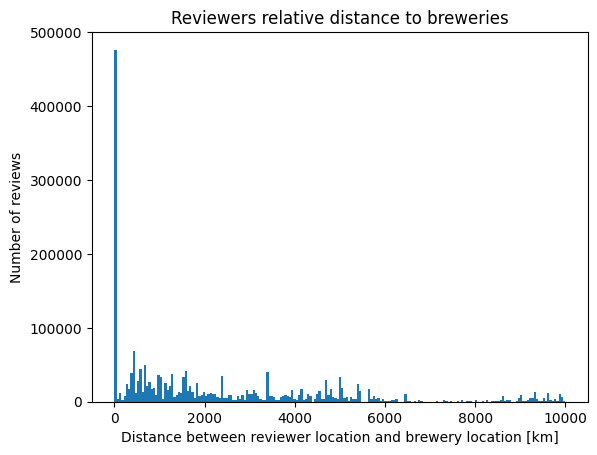

count    2.509527e+06
mean     4.102727e+03
std      5.212940e+03
min      0.000000e+00
25%      4.257385e+02
50%      1.839347e+03
75%      5.360611e+03
max      1.385372e+05
Name: distance, dtype: float64

In [484]:
plt.hist(rev_distance['distance'],bins=np.linspace(0,10000,200))
# Set x and y labels and the title
plt.xlabel('Distance between reviewer location and brewery location [km]')
plt.ylabel('Number of reviews')
plt.title('Reviewers relative distance to breweries')
plt.show()
rev_distance['distance'].describe()

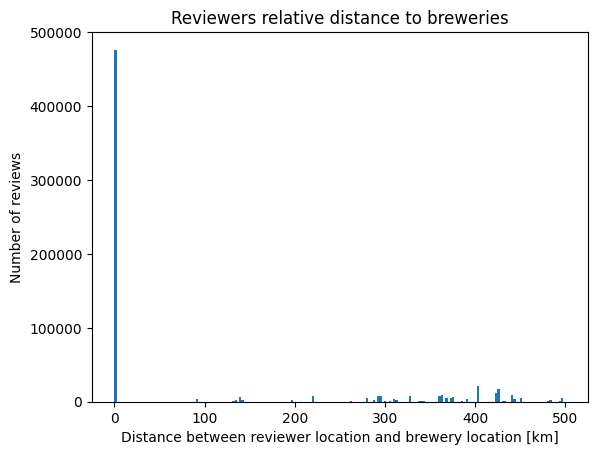

count    2.509527e+06
mean     4.102727e+03
std      5.212940e+03
min      0.000000e+00
25%      4.257385e+02
50%      1.839347e+03
75%      5.360611e+03
max      1.385372e+05
Name: distance, dtype: float64

In [486]:
plt.hist(rev_distance['distance'],bins=np.linspace(0,500,200))
# Set x and y labels and the title
plt.xlabel('Distance between reviewer location and brewery location [km]')
plt.ylabel('Number of reviews')
plt.title('Reviewers relative distance to breweries')
plt.show()


### Merge reviews with users dataframe

In [254]:
reviews_aug = pd.merge(reviews_filt, users_loc, on=['user_id','user_name'], how='inner')
display(reviews_aug)

,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,nbr_ratings,nbr_reviews,joined,user_location,user_state
0,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-04-09 10:00:00,Proteus93,proteus93.185128,4.0,4.5,4.5,4.5,4.0,4.37,"A: A deep amber, with a bit of a shorter head....",1010,1010,2008-01-08 11:00:00,United States of America,Virginia
1,Double Bastard Ale,1056,Arrogant Brewing,43153,American Strong Ale,2008-05-22 10:00:00,Proteus93,proteus93.185128,4.5,4.5,5.0,4.5,4.5,4.55,A: Poured into a standard Stone pintglass. A d...,1010,1010,2008-01-08 11:00:00,United States of America,Virginia
2,OAKED Arrogant Bastard Ale,8951,Arrogant Brewing,43153,American Strong Ale,2008-01-26 11:00:00,Proteus93,proteus93.185128,5.0,4.0,4.5,4.5,4.5,4.41,"A: A deep brown pour, some red highlights. Bea...",1010,1010,2008-01-08 11:00:00,United States of America,Virginia
3,Trader Joe's 2012 Vintage Ale,86743,Trader Joe's Brewing Company,10707,Belgian Strong Dark Ale,2012-11-17 11:00:00,Proteus93,proteus93.185128,4.0,4.0,4.0,3.5,3.5,3.70,So we just had a Trader Joe's open up in Charl...,1010,1010,2008-01-08 11:00:00,United States of America,Virginia
4,Le Merle,37112,North Coast Brewing Co.,112,Saison / Farmhouse Ale,2009-01-19 11:00:00,Proteus93,proteus93.185128,4.0,3.5,4.5,4.0,4.0,3.93,"Served on tap at Beer Run in Charlottesville, ...",1010,1010,2008-01-08 11:00:00,United States of America,Virginia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494468,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2009-06-02 10:00:00,GWEBB9,gwebb9.166159,4.5,5.0,5.0,4.5,5.0,4.77,This is a great beer. Always go back to this o...,1,1,2007-10-20 10:00:00,United States of America,Maryland
2494469,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2009-04-16 10:00:00,norsktorsk,norsktorsk.319436,4.0,5.0,4.0,4.5,4.5,4.54,Its the start of the Stanley Cup Playoffs an I...,2,1,2009-04-13 10:00:00,United States of America,New York
2494470,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2009-03-04 11:00:00,benjilek,benjilek.300077,4.5,3.5,4.5,4.0,4.0,3.96,This was an exceptional beer. Very unique. It ...,1,1,2009-02-18 11:00:00,United States of America,Maryland
2494471,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-12-21 11:00:00,DunDun,dundun.272883,5.0,4.5,4.5,5.0,5.0,4.83,This is my first review and I just had to say ...,1,1,2008-12-02 11:00:00,United States of America,Ohio


### Merge reviews and users with breweries dataframe

In [255]:
df_RBU = pd.merge(reviews_aug, breweries_loc, on=['brewery_id','brewery_name'], how='inner')
display(df_RBU)
print('Number of NaN by category:')
print(df_RBU.isna().sum())

,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,appearance,aroma,...,rating,text,nbr_ratings,nbr_reviews,joined,user_location,user_state,brewery_location,nbr_beers,state
0,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-04-09 10:00:00,Proteus93,proteus93.185128,4.0,4.5,...,4.37,"A: A deep amber, with a bit of a shorter head....",1010,1010,2008-01-08 11:00:00,United States of America,Virginia,United States of America,41,California
1,Double Bastard Ale,1056,Arrogant Brewing,43153,American Strong Ale,2008-05-22 10:00:00,Proteus93,proteus93.185128,4.5,4.5,...,4.55,A: Poured into a standard Stone pintglass. A d...,1010,1010,2008-01-08 11:00:00,United States of America,Virginia,United States of America,41,California
2,OAKED Arrogant Bastard Ale,8951,Arrogant Brewing,43153,American Strong Ale,2008-01-26 11:00:00,Proteus93,proteus93.185128,5.0,4.0,...,4.41,"A: A deep brown pour, some red highlights. Bea...",1010,1010,2008-01-08 11:00:00,United States of America,Virginia,United States of America,41,California
3,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-04-07 10:00:00,Jerico,jerico.36192,4.0,4.0,...,3.40,Poured this into a Bordeaux wine glass.A - A p...,47,47,2005-08-23 10:00:00,United States of America,New York,United States of America,41,California
4,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-04-06 10:00:00,armock,armock.159910,4.0,4.5,...,4.32,A - Poured a dark amber color with an of white...,1409,1256,2007-09-21 10:00:00,United States of America,New York,United States of America,41,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344228,La Porteña Stout,273430,La Porteña Cervecería Artesanal,48642,American Stout,2017-03-23 11:00:00,Short_And_Stout,short_and_stout.1194173,4.0,3.5,...,3.76,"Look: dark brown, hints of red when held up to...",1,1,2017-03-15 11:00:00,United States of America,Pennsylvania,Nicaragua,1,Nicaragua
2344229,Public Static Lemongrass IPA,156860,Nerdbrewing,38748,American IPA,2015-02-08 11:00:00,kazin,kazin.236728,3.75,4.5,...,4.36,Sampled from bottle. Very cloudy appearance bu...,23,6,2008-07-23 10:00:00,Sweden,Sweden,Sweden,4,Sweden
2344230,R34 Porter,131988,Kozy Yak Brewery,33346,American Porter,2014-08-03 10:00:00,WalterDragon,walterdragon.838867,3.0,2.0,...,1.51,"Thought I would try a small, local brew pub. T...",16,2,2014-08-03 10:00:00,United States of America,Wisconsin,United States of America,9,Wisconsin
2344231,Can't Hook Kolsch,258870,Sawmill Brewing Company,44767,Kölsch,2017-02-27 11:00:00,Gully13,gully13.1192412,4.25,4.5,...,4.69,Poured from a growlerOverall a great take on t...,4,3,2017-02-27 11:00:00,United States of America,North Carolina,United States of America,11,Wisconsin


Number of NaN by category:
beer_name           0
beer_id             0
brewery_name        0
brewery_id          0
style               0
date                0
user_name           0
user_id             0
appearance          0
aroma               0
palate              0
taste               0
overall             0
rating              0
text                0
nbr_ratings         0
nbr_reviews         0
joined              0
user_location       0
user_state          0
brewery_location    0
nbr_beers           0
state               0
dtype: int64


## CODE USED TO SPLIT reviews.txt etc.

In [ ]:
row_count = 0

# Open the file and count the lines
with open(Reviews_DATASET, 'r', encoding='utf-8') as file:
    for line in file:
        row_count += 1

print(f'Number of rows in the file: {row_count}')

In [ ]:
lines_per_file = 2316998
smallfile = None
with open(Reviews_DATASET, 'r', encoding='utf-8') as bigfile:
    for lineno, line in enumerate(bigfile):
        if lineno % lines_per_file == 0:
            if smallfile:
                smallfile.close()
            small_filename = '../DATA/BeerAdvocate/reviews/small_file_{}.txt'.format(lineno + lines_per_file)
            smallfile = open(small_filename, "w", encoding='utf-8')
        smallfile.write(line)
    if smallfile:
        smallfile.close()

In [ ]:
directory = DATA_FOLDER_BA + 'reviews/'
reviews = pd.DataFrame()
for filename in os.listdir(directory):
    # Initialize empty lists to store the extracted data
    beer_data = []
    current_review = {}  # Initialize an empty dictionary to store the current review
    # Open the text file and read it line by line
    with open(directory + filename, 'r', encoding='utf-8') as file:

        for line in file:
            line = line.strip()  # Remove leading/trailing whitespace
            if line:  # If the line is not empty
                key, value = line.split(":",1)
                current_review[key] = value
            else:  # Blank line indicates the end of a review
                if current_review:
                    beer_data.append(current_review)
                current_review = {}  # Reset the dictionary for the next review

    # If there's any remaining review, add it to the list
    if current_review:
        beer_data.append(current_review)

    # Convert the list of dictionaries into a Pandas DataFrame
    reviews_tmp = pd.DataFrame(beer_data)
    reviews = pd.concat([reviews,reviews_tmp])


display(reviews)

In [ ]:
lines_per_file = 2316998
smallfile = None
with open(Reviews_DATASET, 'r', encoding='utf-8') as bigfile:
    for lineno, line in enumerate(bigfile):
        if lineno % lines_per_file == 0:
            if smallfile:
                smallfile.close()
            small_filename = '../DATA/BeerAdvocate/reviews/small_file_{}.txt'.format(lineno + lines_per_file)
            smallfile = open(small_filename, "w", encoding='utf-8')
        smallfile.write(line)
    if smallfile:
        smallfile.close()

In [ ]:
filename_review = DATA_FOLDER_BA + 'reviews_BA.csv'
reviews.to_csv(filename_review, encoding='utf-8', index=False)